In [1]:

from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log
import numpy as np
import pandas as pd 
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.manifold import MDS
exec(compile(open(r"../nsimplices.py", encoding="utf8").read(), "nsimplices.py", 'exec'))

In [2]:
df_gene = pd.read_csv("~/nSimplices/data/sce_full_Darmanis_scScope.csv", index_col=0, header=0)
# df_gene = pd.read_csv("~/nSimplices/data/sce_full_Baron_scScope.csv", index_col=0, header=0)

print(df_gene.shape)
df_gene

(420, 17206)


,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,AAA1,AAAS,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,tAKR
GSM1658365,0,0,0,0,0,0,0,0,0,0,...,0,28,0,5,0,67,9,0,0,0
GSM1658366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,22,0,0,6,0,7,0
GSM1658364,0,0,0,0,0,0,0,0,0,77,...,0,0,0,0,0,0,0,0,0,0
GSM1658363,0,0,0,0,0,0,0,0,0,14,...,0,0,0,18,0,0,0,0,4,0
GSM1658362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,8,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1657983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,9,15,1,109,43,0
GSM1657984,64,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,50,0,0,2,0
GSM1657985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,191,68,0,3,0
GSM1657986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,243,0,114,0,0,290,0


In [3]:
def custom_log(x):
    if x != 0:
        return log(x)
    return x

In [4]:
# df_gene = df_gene.applymap(custom_log)
# df_gene

In [5]:

### Run nSimplices method
feature_num = df_gene.shape[1]
dim_start = 2
dim_end = 2
out_dis = pdist(df_gene)
out_dis_sq = squareform(out_dis)
num_point = df_gene.shape[0]

outlier_indices, subspace_dim, corr_dis_sq, corr_coord = nsimplices(out_dis_sq, feature_num, dim_start, dim_end, euc_coord=np.array(df_gene.copy()), std_multi=3)

dim in find_subspace_dim is: 2
med_height is: [20414.09755605]
subspace_dim is: 2
thres is: 43748.978507635606 mean is: 23835.329678941573 std is: 4978.412207173509
outlier indices are: [ 94 114 148 200 205 206 208 209 214 220 226 239 245 250 252 284 295 321
 323 329 332 339 355 397 401 404 407 411]
idx is: 94 height is: 55516.5950350355 thres is: 43748.978507635606
idx is: 114 height is: 46899.308119386056 thres is: 43748.978507635606
idx is: 148 height is: 45751.091897910985 thres is: 43748.978507635606
idx is: 200 height is: 51481.647386154225 thres is: 43748.978507635606
idx is: 205 height is: 44331.443752604595 thres is: 43748.978507635606
idx is: 206 height is: 44316.17873089084 thres is: 43748.978507635606
idx is: 208 height is: 55215.12583911895 thres is: 43748.978507635606
idx is: 209 height is: 44626.9892176269 thres is: 43748.978507635606
idx is: 214 height is: 45558.53077666142 thres is: 43748.978507635606
idx is: 220 height is: 50353.71076690679 thres is: 43748.97850763560

In [16]:
len(outlier_indices)

44

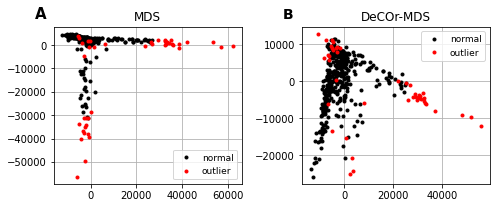

In [17]:
normal_indices=[i for i in range(num_point) if i not in outlier_indices] # list of normal points 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,3))

fig_path =  "../outputs/Darmanis_MDS.pdf"

# plot original graphs with outliers added 
va, ve, Xe = cMDS(out_dis_sq)
ax1.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='black', label="normal")
ax1.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red', label="outlier")
ax1.legend(fontsize=9)
ax1.grid()
ax1.set_title("MDS")
ax1.text(-0.1, 1.05, 'A', transform=ax1.transAxes, 
        size=15, weight='bold')

# plot correct outliers 
va, ve, Xe = cMDS(corr_dis_sq)   
ax2.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='black', label="normal")
ax2.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red', label="outlier")
ax2.legend(fontsize=9)
ax2.set_title("DeCOr-MDS")
ax2.text(-0.1, 1.05, 'B', transform=ax2.transAxes, 
        size=14, weight='bold')
ax2.grid()
plt.tight_layout()
plt.savefig(fig_path)
plt.show()
plt.close()

In [5]:
from plotly.offline import plot
import plotly.express as px
import plotly
from plotly.subplots import make_subplots


normal_indices=[i for i in range(num_point) if i not in outlier_indices] # list of normal points 

# # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,3))
# ax1 = plt.axes(projection='3d')
# ax2 = plt.axes(projection='3d')

# fig = plt.figure()
# ax1 = fig.add_subplot(1, 2, 1, projection='3d')
outlier_vector = np.zeros(Xe.shape[0])
outlier_vector[outlier_indices] = 1


# plot original graphs with outliers added 
va, ve, Xe = cMDS(out_dis_sq)
df = pd.DataFrame({'x': Xe[:, 0], 'y': Xe[:, 1], 'z': Xe[:, 2], 'outlier': outlier_vector})

# ax1.plot3D(Xe[normal_indices,0],Xe[normal_indices,1], Xe[normal_indices,2], '.', color='black', label="normal")
# ax1.plot3D(Xe[outlier_indices,0],Xe[outlier_indices,1], Xe[outlier_indices,2], '.',color='red', label="outlier")
# ax1.legend(fontsize=9)
# ax1.grid()
# ax1.set_title("Outliers added")
# ax1.text(-0.1, 1.05, 'B', transform=ax1.transAxes, 
#         size=15, weight='bold')
fig1 = px.scatter_3d(df, x='x', y='y', z='z', color='outlier',
                 width=700, height=500,
                 title="3D Scatter Plot")
fig1.update_traces(marker_size = 3)

# fig.show()
# plotly.offline.plot(fig, filename="fig1.html")

# plt.show()

# plot correct outliers 
va, ve, Xe = cMDS(corr_dis_sq)   
df = pd.DataFrame({'x': Xe[:, 0], 'y': Xe[:, 1], 'z': Xe[:, 2], 'outlier': outlier_vector})

# ax2.plot3D(Xe[normal_indices,0],Xe[normal_indices,1], Xe[normal_indices,2], '.', color='black', label="normal")
# ax2.plot3D(Xe[outlier_indices,0],Xe[outlier_indices,1], Xe[outlier_indices,2], '.',color='red', label="outlier")
# ax2.legend(fontsize=9)
# ax2.set_title("Corrected data")
# ax2.text(-0.1, 1.05, 'C', transform=ax2.transAxes, 
#         size=14, weight='bold')
# ax2.grid()
# plt.savefig(cross_fig_path)
fig2 = px.scatter_3d(df, x='x', y='y', z='z', color='outlier',
                 width=700, height=500,
                 title="3D Scatter Plot")
fig2.update_traces(marker_size = 3)
# fig.show()
# plt.show()
# plt.close()


figures = [
            fig1,
            fig2
    ]

fig = make_subplots(rows=1, cols=2) 




for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=1, col=i+1)

plot(fig)

ValueError: Trace type 'scatter3d' is not compatible with subplot type 'xy'
at grid position (1, 1)

See the docstring for the specs argument to plotly.subplots.make_subplots
for more information on subplot types

In [6]:
# fig = plt.figure()
# ax2 = fig.add_subplot(1, 2, 1, projection='3d')
# # plot correct outliers 
# va, ve, Xe = cMDS(corr_dis_sq)   
# ax2.plot3D(Xe[normal_indices,0],Xe[normal_indices,1], Xe[normal_indices,2], '.', color='black', label="normal")
# ax2.plot3D(Xe[outlier_indices,0],Xe[outlier_indices,1], Xe[outlier_indices,2], '.',color='red', label="outlier")
# ax2.legend(fontsize=9)
# ax2.set_title("Corrected data")
# # ax2.text(-0.1, 1.05, 'C', transform=ax2.transAxes, 
# #         size=14, weight='bold')
# ax2.grid()
# # plt.savefig(cross_fig_path)
# plt.show()
# # plt.close()

In [13]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{'type': 'scene'}, {'type': 'scene'}]])

va, ve, Xe = cMDS(out_dis_sq)

fig.add_trace(
    go.Scatter3d(x=Xe[:, 0], y=Xe[:, 1], z=Xe[:, 2], mode='markers', marker={"size": 3}),
    row=1, col=1
)

va, ve, Xe = cMDS(corr_dis_sq)   
fig.add_trace(
    go.Scatter3d(x=Xe[:, 0], y=Xe[:, 1], z=Xe[:, 2], mode='markers', marker={"size": 3}),
    row=1, col=2
)

# fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()